<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#描述性统计" data-toc-modified-id="描述性统计-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>描述性统计</a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LSTM</a></span><ul class="toc-item"><li><span><a href="#预测股票价格-try" data-toc-modified-id="预测股票价格-try-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>预测股票价格 try</a></span><ul class="toc-item"><li><span><a href="#画图" data-toc-modified-id="画图-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>画图</a></span></li><li><span><a href="#calculate-MSE-RMSE-MAPE-R2" data-toc-modified-id="calculate-MSE-RMSE-MAPE-R2-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>calculate MSE RMSE MAPE R2</a></span></li><li><span><a href="#10天为一个区间" data-toc-modified-id="10天为一个区间-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>10天为一个区间</a></span></li><li><span><a href="#1天一个区间" data-toc-modified-id="1天一个区间-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>1天一个区间</a></span></li><li><span><a href="#(完整）3天为一个区间" data-toc-modified-id="(完整）3天为一个区间-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>(完整）3天为一个区间</a></span></li></ul></li><li><span><a href="#rolling-windows" data-toc-modified-id="rolling-windows-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>rolling windows</a></span></li><li><span><a href="#预测股票涨跌" data-toc-modified-id="预测股票涨跌-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>预测股票涨跌</a></span><ul class="toc-item"><li><span><a href="#准确率" data-toc-modified-id="准确率-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>准确率</a></span></li><li><span><a href="#增加-换手率，移动平均线，乖离率" data-toc-modified-id="增加-换手率，移动平均线，乖离率-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>增加 换手率，移动平均线，乖离率</a></span><ul class="toc-item"><li><span><a href="#预测涨跌" data-toc-modified-id="预测涨跌-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>预测涨跌</a></span></li><li><span><a href="#网格搜索-超参数调优" data-toc-modified-id="网格搜索-超参数调优-3.3.2.2"><span class="toc-item-num">3.3.2.2&nbsp;&nbsp;</span>网格搜索 超参数调优</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#陈兴明的方法" data-toc-modified-id="陈兴明的方法-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>陈兴明的方法</a></span></li><li><span><a href="#陈兴明方法-改成预测趋势" data-toc-modified-id="陈兴明方法-改成预测趋势-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>陈兴明方法 改成预测趋势</a></span><ul class="toc-item"><li><span><a href="#增加换手率" data-toc-modified-id="增加换手率-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>增加换手率</a></span></li><li><span><a href="#预测股票收益率" data-toc-modified-id="预测股票收益率-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>预测股票收益率</a></span></li><li><span><a href="#滚动预测，窗口为60，应该如何分割数据集" data-toc-modified-id="滚动预测，窗口为60，应该如何分割数据集-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>滚动预测，窗口为60，应该如何分割数据集</a></span></li><li><span><a href="#滑动窗口，预测未来5天收益率？" data-toc-modified-id="滑动窗口，预测未来5天收益率？-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>滑动窗口，预测未来5天收益率？</a></span></li></ul></li></ul></div>

# import

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing  
from keras.callbacks import EarlyStopping



In [2]:
import pandas as pd
df = pd.read_csv('SSE history data.csv')

df.head()
# 修改列名
df.columns = ['date', 'open', 'high', 'low', 'volume','close','direction']
# Delete columns 'date' and 'updown' in-place
df.drop('direction', axis=1, inplace=True)
# Convert the 'date' column to appropriate date/time representation
df['date'] = pd.to_datetime(df['date'])

# Make a copy of the DataFrame before setting 'date' column as index
df_copy = df.copy()

# Set 'date' column as DataFrame's index
df.set_index('date', inplace=True)

# Remove index column name
df.index.name = None

# Sort the DataFrame by the date index in ascending order
df = df.sort_index(ascending=True)
df

,open,high,low,volume,close
2012-01-04,2212.00,2217.52,2168.64,49200000,2169.39
2012-01-05,2160.90,2183.40,2145.56,58700000,2148.45
2012-01-06,2148.15,2164.32,2132.63,50600000,2163.39
2012-01-09,2164.74,2226.22,2148.45,76800000,2225.89
2012-01-10,2221.83,2288.63,2218.27,109600000,2285.74
...,...,...,...,...,...
2022-12-26,3048.20,3071.84,3047.35,206500000,3065.56
2022-12-27,3077.75,3098.08,3074.31,222200000,3095.57
2022-12-28,3088.62,3098.65,3079.43,224600000,3087.40
2022-12-29,3076.73,3086.00,3064.46,215600000,3073.70


In [3]:
df.shape

(2674, 5)

In [4]:
df.tail()

,open,high,low,volume,close
2022-12-26,3048.20,3071.84,3047.35,206500000,3065.56
2022-12-27,3077.75,3098.08,3074.31,222200000,3095.57
2022-12-28,3088.62,3098.65,3079.43,224600000,3087.40
2022-12-29,3076.73,3086.00,3064.46,215600000,3073.70
2022-12-30,3084.52,3096.31,3082.20,217500000,3089.26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2674 entries, 2012-01-04 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2674 non-null   float64
 1   high    2674 non-null   float64
 2   low     2674 non-null   float64
 3   volume  2674 non-null   int64  
 4   close   2674 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 125.3 KB


# 描述性统计

In [6]:
# 计算描述性统计
stat = df.describe() 

In [7]:
# 计算极差和四分位数间距
stat.loc['range'] = stat.loc['max'] - stat.loc['min'] #极差
stat.loc['dis'] = stat.loc['75%'] - stat.loc['25%'] #四分位数间距
stat.loc['var'] = stat.loc['std']/np.sqrt(df.shape[0]) #标准误
stat

,open,high,low,volume,close
count,2674.000000,2674.000000,2674.000000,2.674000e+03,2674.000000
mean,2941.427644,2963.928979,2919.632203,2.253963e+08,2944.663620
std,554.010475,560.407315,545.496811,1.320508e+08,554.352789
min,1935.520000,1959.160000,1849.650000,4.260000e+07,1950.010000
25%,2426.415000,2440.412500,2414.400000,1.275000e+08,2428.235000
50%,3037.480000,3060.150000,3015.285000,1.915000e+08,3041.185000
75%,3306.667500,3328.130000,3282.130000,3.017000e+08,3309.717500
max,5174.420000,5178.190000,5103.400000,8.571000e+08,5166.350000
range,3238.900000,3219.030000,3253.750000,8.145000e+08,3216.340000
dis,880.252500,887.717500,867.730000,1.742000e+08,881.482500


# LSTM

## 预测股票价格 try 

In [8]:
df_sorted =df.sort_index(ascending=True)
df_sorted

,open,high,low,volume,close
2012-01-04,2212.00,2217.52,2168.64,49200000,2169.39
2012-01-05,2160.90,2183.40,2145.56,58700000,2148.45
2012-01-06,2148.15,2164.32,2132.63,50600000,2163.39
2012-01-09,2164.74,2226.22,2148.45,76800000,2225.89
2012-01-10,2221.83,2288.63,2218.27,109600000,2285.74
...,...,...,...,...,...
2022-12-26,3048.20,3071.84,3047.35,206500000,3065.56
2022-12-27,3077.75,3098.08,3074.31,222200000,3095.57
2022-12-28,3088.62,3098.65,3079.43,224600000,3087.40
2022-12-29,3076.73,3086.00,3064.46,215600000,3073.70


In [9]:

#為了避免原始数据太大或是太小没有统一的范围而导致 LSTM 在训练时难以收敛，我们以一个最小最大零一正规化方法对数据进行修正： 
def normalize(df):  
    newdf= df.copy()  
    min_max_scaler = preprocessing.MinMaxScaler()    
    newdf['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))  
    newdf['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))  
    newdf['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))  
    newdf['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))  
    newdf['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))    
    return newdf  
df_norm = normalize(df_sorted) 
df_norm

,open,high,low,volume,close
2012-01-04,0.085362,0.080260,0.098038,0.008103,0.068208
2012-01-05,0.069585,0.069661,0.090944,0.019767,0.061697
2012-01-06,0.065649,0.063733,0.086970,0.009822,0.066342
2012-01-09,0.070771,0.082963,0.091833,0.041989,0.085775
2012-01-10,0.088397,0.102351,0.113291,0.082259,0.104383
...,...,...,...,...,...
2022-12-26,0.343536,0.345657,0.368098,0.201228,0.346838
2022-12-27,0.352660,0.353808,0.376384,0.220503,0.356169
2022-12-28,0.356016,0.353986,0.377958,0.223450,0.353629
2022-12-29,0.352345,0.350056,0.373357,0.212400,0.349369


In [10]:
# 以20天为一区间进行股价预测  
X_train, y_train, X_test, y_test = data_helper(df_norm, 20)  
#我们以 Keras 框架作为 LSTM 的模型选择，首先在前面加了两层 256个神经元的 LSTM layer，并都加上了Dropout层来防止数据过度拟合（overfitting）。最后再加上两层有不同数目神经元的全连结层来得到只有1维数值的输出结果，也就是预测股价： 
def build_model(input_length, input_dim):  
    d = 0.3  
    model = Sequential()  
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))  
    model.add(Dropout(d))  
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=False)) 
    model.add(Dropout(d))  
    model.add(Dense(16,kernel_initializer="uniform",activation='relu'))  
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))  
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy']) 
    return model  
# 20天、5维  
model = build_model( 20, 5 ) 

NameError: name 'data_helper' is not defined

In [ ]:
#建立好 LSTM 模型后，我们就用前面编辑好的训练数据集开始进行模型的训练：LSTM 模型训练 
# 一个batch有128个instance，总共跑50个迭代  
model.fit( X_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1) 

In [ ]:
#在经过一段时间的训练过程后，我们便能得到 LSTM 模型（model）。接着再用这个模型对测试数据进行预测，以及将预测出来的数值（pred）与实际股价（y_test）还原回原始股价的大小区间：
def denormalize(df, norm_value):  
    original_value = df['close'].values.reshape(-1,1)  
    norm_valuenorm_value = norm_value.reshape(-1,1)      
    min_max_scaler = preprocessing.MinMaxScaler()  
    min_max_scaler.fit_transform(original_value)  
    denorm_value = min_max_scaler.inverse_transform(norm_value.reshape(-1, 1))
     
    return denorm_value  
# 用训练好的 LSTM 模型对测试数据集进行预测  
pred = model.predict(X_test)  
# 将预测值与实际股价还原回原来的区间值  
denorm_pred = denormalize(df_sorted, pred)  
denorm_ytest = denormalize(df_sorted, y_test) 



### 画图

In [ ]:
plt.plot(denorm_pred,color='red', label='Prediction')  
plt.plot(denorm_ytest,color='blue', label='Answer')  
plt.legend(loc='best')  
plt.show() 

In [ ]:

# Create a new Series with NaN values and the same index as df_sorted['close']
denorm_pred_series = pd.Series(np.nan, index=df_sorted.index)

# Set the last 261 values of denorm_pred_series to denorm_pred (flatten denorm_pred to make it 1-dimensional)
denorm_pred_series.iloc[-len(denorm_pred):] = denorm_pred.flatten()

# Concatenate df_sorted['close'], denorm_pred_series, and denorm_ytest_series as new columns in a new DataFrame
result_df = pd.concat([df_sorted['close'].rename('Actual Closing Price'), denorm_pred_series.rename('Predicted Closing Price')], axis=1)

# Plot the data
plt.figure(figsize=(16, 12))
plt.plot(result_df['Predicted Closing Price'], color='red', label='Predicted Closing Price')
plt.plot(result_df['Actual Closing Price'], color='blue', label='Actual Closing Price')
plt.xlabel('Time')  
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Price')
plt.legend(loc='best')
plt.show()


### calculate MSE RMSE MAPE R2

In [ ]:


# Calculate Mean Squared Error (MSE)
mse = np.mean((denorm_ytest - denorm_pred) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((denorm_ytest - denorm_pred) / y_test)) * 100
# Calculate R-squared (R2)
r2 = r2_score(denorm_ytest, denorm_pred)
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
    'Value': [mse, rmse, mape, r2]
})


results

### 10天为一个区间

In [ ]:
# 以10天为一区间进行股价预测  
X_train, y_train, X_test, y_test = data_helper(df_norm, 10) 
# 10天、5维  
model = build_model( 10, 5 ) 
# 一个batch有128个instance，总共跑50个迭代  
model.fit( X_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1) 
# 用训练好的 LSTM 模型对测试数据集进行预测  
pred = model.predict(X_test)  
# 将预测值与实际股价还原回原来的区间值  
denorm_pred = denormalize(df_sorted, pred)  
denorm_ytest = denormalize(df_sorted, y_test) 
# Calculate Mean Squared Error (MSE)
mse = np.mean((denorm_ytest - denorm_pred) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((denorm_ytest - denorm_pred) / y_test)) * 100
# Calculate R-squared (R2)
r2 = r2_score(denorm_ytest, denorm_pred)
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
    'Value': [mse, rmse, mape, r2]
})


results

### 1天一个区间

In [ ]:
# 以1天为一区间进行股价预测  
X_train, y_train, X_test, y_test = data_helper(df_norm, 1) 
# 1天、5维  
model = build_model( 1, 5 ) 
# 一个batch有128个instance，总共跑50个迭代  
model.fit( X_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1) 
# 用训练好的 LSTM 模型对测试数据集进行预测  
pred = model.predict(X_test)  
# 将预测值与实际股价还原回原来的区间值  
denorm_pred = denormalize(df_sorted, pred)  
denorm_ytest = denormalize(df_sorted, y_test) 
# Calculate Mean Squared Error (MSE)
mse = np.mean((denorm_ytest - denorm_pred) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((denorm_ytest - denorm_pred) / y_test)) * 10
# Calculate R-squared (R2)
r2 = r2_score(denorm_ytest, denorm_pred)
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
    'Value': [mse, rmse, mape, r2]
})


results

### (完整）3天为一个区间

In [ ]:
# 以3天为一区间进行股价预测  
X_train, y_train, X_test, y_test = data_helper(df_norm, 3) 
# 3天、5维  
model = build_model( 3, 5 ) 
# 一个batch有128个instance，总共跑50个迭代  
model.fit( X_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1) 
# 用训练好的 LSTM 模型对测试数据集进行预测  
pred = model.predict(X_test)  
# 将预测值与实际股价还原回原来的区间值  
denorm_pred = denormalize(df_sorted, pred)  
denorm_ytest = denormalize(df_sorted, y_test) 
# Calculate Mean Squared Error (MSE)
mse = np.mean((denorm_ytest - denorm_pred) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((denorm_ytest - denorm_pred) / y_test)) * 10
# Calculate R-squared (R2)
r2 = r2_score(denorm_ytest, denorm_pred)
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
    'Value': [mse, rmse, mape, r2]
})


results

## rolling windows

To achieve the training with a rolling dataset method and save the model every 50 trading days, you can follow these steps:

1. Define a rolling window for the training dataset, with each window containing 50 trading days' data.
2. Train the LSTM model using each rolling window of data.
3. Save the trained model every 50 trading days.
4. For the prediction and testing phase, use the last 250 days of each stock's data as the total testing period.
5. Add the sentiment (senti) feature before and after the predicted trend to create a comparison chart.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Define the function to normalize the dataframe
def normalize(df):
    newdf = df.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    newdf['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1, 1))
    newdf['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1, 1))
    newdf['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1, 1))
    newdf['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1, 1))
    newdf['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1, 1))
    return newdf

# Normalize the dataframe
df_norm = normalize(df_sorted)

# Define the function to split the data into training and testing sets
def data_helper(df, time_frame):
    number_features = len(df.columns)
    datavalue = df.values
    result = []
    for index in range(len(datavalue) - (time_frame + 1)):
        result.append(datavalue[index: index + (time_frame + 1)])
    result = np.array(result)
    number_train = round(0.9 * result.shape[0])
    x_train = result[:int(number_train), :-1]
    y_train = result[:int(number_train), -1][:, -1]
    x_test = result[int(number_train):, :-1]
    y_test = result[int(number_train):, -1][:, -1]
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], number_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], number_features))
    return [x_train, y_train, x_test, y_test]

# Define the function to build the LSTM model
def build_model(input_length, input_dim):
    d = 0.3
    model = Sequential()
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=False))
    model.add(Dropout(d))
    model.add(Dense(16, kernel_initializer="uniform", activation='relu'))
    model.add(Dense(1, kernel_initializer="uniform", activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model

# Define the rolling window size and save interval
rolling_window = 50
save_every = 50

# Loop through the data with the rolling window size
for index in range(len(df_norm) - (rolling_window + 250)):
    # Extract the rolling window data
    df_window = df_norm.iloc[index:index+rolling_window+250]
    X_train, y_train, X_test, y_test = data_helper(df_window, 20)

    # Build the LSTM model
    model = build_model(20, 5)

    # Train the model
    model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1)

    # Save the model every 50 trading days
    if (index + rolling_window) % save_every == 0:
        model.save(f'model_day_{index + rolling_window}.h5')


In [ ]:
#在经过一段时间的训练过程后，我们便能得到 LSTM 模型（model）。接着再用这个模型对测试数据进行预测，以及将预测出来的数值（pred）与实际股价（y_test）还原回原始股价的大小区间：
def denormalize(df, norm_value):  
    original_value = df['close'].values.reshape(-1,1)  
    norm_valuenorm_value = norm_value.reshape(-1,1)      
    min_max_scaler = preprocessing.MinMaxScaler()  
    min_max_scaler.fit_transform(original_value)  
    denorm_value = min_max_scaler.inverse_transform(norm_value.reshape(-1, 1))
     
    return denorm_value  
# 用训练好的 LSTM 模型对测试数据集进行预测  
pred = model.predict(X_test)  
# 将预测值与实际股价还原回原来的区间值  
denorm_pred = denormalize(df_sorted, pred)  
denorm_ytest = denormalize(df_sorted, y_test) 



In [ ]:


# Calculate Mean Squared Error (MSE)
mse = np.mean((denorm_ytest - denorm_pred) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((denorm_ytest - denorm_pred) / y_test)) * 100
# Calculate R-squared (R2)
r2 = r2_score(denorm_ytest, denorm_pred)
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
    'Value': [mse, rmse, mape, r2]
})


results

## 预测股票涨跌

你的模型现在使用开盘价、收盘价、最高价、最低价和交易量作为特征，并且使用收盘价的涨跌作为标签进行预测。训练集占总数据的60%，验证集占20%，测试集占20%。模型将在训练集和验证集上进行训练，并在测试集上进行评估。将第 21 天的涨跌作为输出标签（即：data[i + time_frame][1]）

In [ ]:
# 假设你的原始数据中有'Open'、'Close'、'High'、'Low'、'Volume'等列，我们用这些列作为特征
selected_features = ['open', 'high', 'low', 'volume', 'close']
df_selected = df[selected_features]
df_selected

In [ ]:
# Normalize the data
def normalize(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(df.values)

df_norm = normalize(df_selected)


In [ ]:
# Assuming the target column is 'close'
# Create a new column 'movement' with binary labels: 1 for price increase, 0 for price decrease
df['movement'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


In [ ]:
# Split the data into training, validation, and testing sets
train_size = int(0.6 * len(df_norm))
valid_size = int(0.2 * len(df_norm))
test_size = len(df_norm) - train_size - valid_size

train_data = df_norm[:train_size]
valid_data = df_norm[train_size:train_size + valid_size]
test_data = df_norm[train_size + valid_size:]


In [ ]:
# 准备数据函数
def prepare_data(data, time_frame):
    X, y = [], []
    for i in range(len(data) - time_frame - 1):
        X.append(data[i:i + time_frame])
        # 将第 21 天的涨跌作为输出标签，如果下一天的'Close'大于当天的'Close'，标记为1，否则标记为0
        y.append(1 if data[i + time_frame + 1][4] > data[i + time_frame][4] else 0)
    return np.array(X), np.array(y)


time_frame = 20  # 味着我们使用前 20 天的数据作为输入序列，用来预测第 21 天的涨跌（输出标签）。这是一种时间滑窗的方法，通过历史数据来预测未来的趋势。
X_train, y_train = prepare_data(train_data, time_frame)#保每个输入序列的长度为 time_frame
X_valid, y_valid = prepare_data(valid_data, time_frame)
X_test, y_test = prepare_data(test_data, time_frame)

In [ ]:
# 打印数据长度信息
print("总数据长度:", len(df_norm))
print("训练集长度:", len(train_data))
print("验证集长度:", len(valid_data))
print("测试集长度:", len(test_data))

In [ ]:
# 构建LSTM模型
def build_model(input_length, input_dim):
    model = Sequential()
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


我们以 Keras 框架作为 LSTM 的模型选择，首先在前面加了两层 256个神经元的 LSTM layer，并都加上了Dropout层来防止数据过度拟合（overfitting）。

这个LSTM模型共有四层，如下所示：

1. 第一层是一个LSTM层，包含256个LSTM单元。输入的形状是`(input_length, input_dim)`，其中`input_length`是输入序列的长度，也就是时间滑窗的大小，`input_dim`是输入特征的维度。这一层设置`return_sequences=True`，表示输出保留每个时间步长的输出序列，用于传递给下一层。

2. 第二层是一个Dropout层，用于在训练过程中以0.3的概率随机丢弃输入的部分元素，以防止过拟合。

3. 第三层是另一个LSTM层，包含256个LSTM单元。这一层设置`return_sequences=False`，表示只输出最后一个时间步长的输出，而不保留完整的输出序列。

4. 第四层是一个Dropout层，同样用于在训练过程中以0.3的概率随机丢弃输入的部分元素，以防止过拟合。

5. 最后，我们添加两个全连接层（Dense层）。第一个全连接层有16个神经元，激活函数使用ReLU。第二个全连接层只有一个神经元，激活函数使用sigmoid。这个模型的任务是进行二进制分类，所以我们使用sigmoid作为最后一层的激活函数，输出值介于0和1之间，表示涨跌的概率。

这个LSTM模型可以接受长度为`input_length`的时间序列数据，每个时间步长有`input_dim`个特征。在训练过程中，由于加入了Dropout层，有一定概率丢弃输入的部分数据，以避免过拟合。整个模型的输出是一个0到1之间的概率值，表示预测的涨跌概率。

In [ ]:
# 创建模型
model = build_model(time_frame, len(selected_features))

# 训练模型
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))


### 准确率

In [ ]:
# 预测和评估模型
predicted_values = model.predict(X_test)

# 将预测值转换为二进制标签，1表示涨，0表示跌
predicted_labels = np.where(predicted_values > 0.5, 1, 0)

# 计算准确率
accuracy = np.mean(predicted_labels == y_test)
print(f"模型准确率: {accuracy}")

# 创建模型
model = build_model(time_frame, len(selected_features))



In [ ]:
# 训练模型并使用早停
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stop])

# 在测试集上评估模型
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

来调整一些设定：

 时间框架长度的调整
 Keras 模型里全连结层的 activation 与 optimizaer 的调整
 Keras 模型用不同的神经网路（种类、顺序、数量）来组合batch_size 的调整、epochs 的调整 …

### 增加 换手率，移动平均线，乖离率

In [ ]:
import pandas as pd
from stockstats import StockDataFrame as Sdf
df_fin = pd.read_excel("stock_data.xlsx")
df_fin

In [ ]:
columns_to_drop = ['name', 'code']
df_fin.drop(columns_to_drop, axis=1, inplace=True)
df_fin

In [ ]:
# 将 DataFrame 转换为 StockDataFrame
stock = Sdf.retype(df_fin)

# 添加 MACD 列
df_fin['macd'] = stock['macd']

# 添加 BIAS 列（假设计算 6 日 BIAS）
df_fin['bias'] = (df_fin['close'] - stock['boll']) / stock['boll'] * 100
# 20天bias
df_fin['bias_20'] = (df_fin['close'] - stock['close_20_sma']) / stock['close_20_sma'] * 100
# 10天bias
df_fin['bias_10'] = (df_fin['close'] - stock['close_10_sma']) / stock['close_10_sma'] * 100
df_fin

#### 预测涨跌

In [ ]:
df_fin = pd.read_excel("SSE macd bias.xlsx")

In [ ]:
# 假设你的原始数据中有'Open'、'Close'、'High'、'Low'、'Volume'等列，我们用这些列作为特征
selected_features = ['open', 'high', 'low', 'volume', 'close', 'turnover_rate', 'macd', 'bias_20']
df_fin_selected = df_fin[selected_features]


# Normalize the data
def normalize(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

# Create a new column 'movement' with binary labels: 1 for price increase, 0 for price decrease
df_fin['movement'] = np.where(df_fin['close'].shift(-1) > df_fin['close'], 1, 0)


# Split the data into training, validation, and testing sets
train_size = int(0.6 * len(df_fin_selected))
valid_size = int(0.2 * len(df_fin_selected))
test_size = len(df_fin_selected) - train_size - valid_size

train_data = df_fin_selected[:train_size]
valid_data = df_fin_selected[train_size:train_size + valid_size]
test_data = df_fin_selected[train_size + valid_size:]

# Normalize the data using only the training set
train_data_norm = normalize(train_data)
valid_data_norm = normalize(valid_data)
test_data_norm = normalize(test_data)

# 准备数据函数
def prepare_data(data, time_frame):
    X, y = [], []
    for i in range(len(data) - time_frame):
        X.append(data[i:i + time_frame])
        y.append(1 if data[i + time_frame][4] > data[i + time_frame - 1][4] else 0)
    return np.array(X), np.array(y)

time_frame = 20
X_train, y_train = prepare_data(train_data_norm, time_frame)
X_valid, y_valid = prepare_data(valid_data_norm, time_frame)
X_test, y_test = prepare_data(test_data_norm, time_frame)


# 构建LSTM模型
def build_model(input_length, input_dim):
    model = Sequential()
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 创建模型
model = build_model(time_frame, len(selected_features))

# 训练模型并使用早停
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stop])

# 在测试集上评估模型
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
# 假设你的原始数据中有'Open'、'Close'、'High'、'Low'、'Volume'等列，我们用这些列作为特征
selected_features = ['open', 'high', 'low', 'volume', 'close', 'turnover_rate', 'macd']
df_fin_selected = df_fin[selected_features]


# Normalize the data
def normalize(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

# Create a new column 'movement' with binary labels: 1 for price increase, 0 for price decrease
df_fin['movement'] = np.where(df_fin['close'].shift(-1) > df_fin['close'], 1, 0)


# Split the data into training, validation, and testing sets
train_size = int(0.6 * len(df_fin_selected))
valid_size = int(0.2 * len(df_fin_selected))
test_size = len(df_fin_selected) - train_size - valid_size

train_data = df_fin_selected[:train_size]
valid_data = df_fin_selected[train_size:train_size + valid_size]
test_data = df_fin_selected[train_size + valid_size:]

# Normalize the data using only the training set
train_data_norm = normalize(train_data)
valid_data_norm = normalize(valid_data)
test_data_norm = normalize(test_data)

# 准备数据函数
def prepare_data(data, time_frame):
    X, y = [], []
    for i in range(len(data) - time_frame):
        X.append(data[i:i + time_frame])
        y.append(1 if data[i + time_frame][4] > data[i + time_frame - 1][4] else 0)
    return np.array(X), np.array(y)

time_frame = 20
X_train, y_train = prepare_data(train_data_norm, time_frame)
X_valid, y_valid = prepare_data(valid_data_norm, time_frame)
X_test, y_test = prepare_data(test_data_norm, time_frame)


# 构建LSTM模型
def build_model(input_length, input_dim):
    model = Sequential()
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 创建模型
model = build_model(time_frame, len(selected_features))

# 训练模型并使用早停
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stop])

# 在测试集上评估模型
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
# 假设你的原始数据中有'Open'、'Close'、'High'、'Low'、'Volume'等列，我们用这些列作为特征
selected_features = ['open', 'high', 'low', 'volume', 'close', 'turnover_rate']
df_fin_selected = df_fin[selected_features]


# Normalize the data
def normalize(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

# Create a new column 'movement' with binary labels: 1 for price increase, 0 for price decrease
df_fin['movement'] = np.where(df_fin['close'].shift(-1) > df_fin['close'], 1, 0)


# Split the data into training, validation, and testing sets
train_size = int(0.6 * len(df_fin_selected))
valid_size = int(0.2 * len(df_fin_selected))
test_size = len(df_fin_selected) - train_size - valid_size

train_data = df_fin_selected[:train_size]
valid_data = df_fin_selected[train_size:train_size + valid_size]
test_data = df_fin_selected[train_size + valid_size:]

# Normalize the data using only the training set
train_data_norm = normalize(train_data)
valid_data_norm = normalize(valid_data)
test_data_norm = normalize(test_data)

# 准备数据函数
def prepare_data(data, time_frame):
    X, y = [], []
    for i in range(len(data) - time_frame):
        X.append(data[i:i + time_frame])
        y.append(1 if data[i + time_frame][4] > data[i + time_frame - 1][4] else 0)
    return np.array(X), np.array(y)

time_frame = 20
X_train, y_train = prepare_data(train_data_norm, time_frame)
X_valid, y_valid = prepare_data(valid_data_norm, time_frame)
X_test, y_test = prepare_data(test_data_norm, time_frame)


# 构建LSTM模型
def build_model(input_length, input_dim):
    model = Sequential()
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 创建模型
model = build_model(time_frame, len(selected_features))

# 训练模型并使用早停
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stop])

# 在测试集上评估模型
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

#### 网格搜索 超参数调优

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ... (Previous code to prepare data and build the LSTM model)

# Create a function to build the Keras LSTM model
def build_lstm_model(lstm_units=128, dropout_rate=0.2, dense_units=16):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier from tensorflow.keras.wrappers.scikit_learn
model = KerasClassifier(build_fn=build_lstm_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'lstm_units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4],
    'dense_units': [16, 32, 64],
    'batch_size': [32, 64, 128]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Get the best hyperparameters and model performance
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# 构建模型的函数
def create_model():
    # 创建模型
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # 编译模型
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 为了复现，设置随机种子
seed = 7
np.random.seed(seed)


# 创建模型
model = KerasClassifier(build_fn=create_model, verbose=0)
# 定义网格搜索参数
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# 总结结果
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

做到一半，代码还没改好！！

In [ ]:
import openpyxl as op
from random import choice
from random import sample
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.losses import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')


# 设置超参数范围
epoch_list_all=[*range(20, 100, 1)] # 训练次数
neure_list_all=[*range(10, 100, 1)] # 神经元个数
seq_len_list_all=[*range(5, 40, 1)] # 序列长度
# print("epoch=",choice(epoch_list),"neure=",choice(neure_list),"seq_len=",choice(seq_len_list))

# 初始化存放三个超参数的列表
List=[]

# 存放每次搜索中超参数组合
# 存放每次搜索所有的超参数组合
CCS_all=[]
# 存放每次搜索中最优的超参数组合
CCS_best=[]

# 最优超参数组合
epoch_best=None
neure_best=None
seq_len_best=None
# 初始化最优（小）的平均绝对误差
MAE_best=100

# 更新最优超参数列表函数
def Change_num(index_X,X_all_list):
    if(3<=index_X<=(len(X_all_list)-3)):
        list_X=X_all_list[index_X-3:index_X+2]
    elif(index_X<3):
        list_X=X_all_list[:5]
    else:
        list_X=X_all_list[-5:]
    print("list_X=",list_X)
    return list_X

# 随机抽取27组进行训练
for i in range(0,27):
    epoch=choice(epoch_list_all)
    neure=choice(neure_list_all)
    seq_len=choice(seq_len_list_all)
    # print("epoch=",epoch,"nerue=",neure,"seq_len=",seq_len)
    List.append(1)
    List[i]=[epoch,neure,seq_len]
print(List)

leean=2

predicted_values = model.predict(X_test)
# 开始随机搜索搜索
for f in range(6):
    # 模型评价指标指标MAE列表初始化
    MAE_list = []

    # LSTM模型（将构建的LSTM模型放入循环内）
    ## 构建LSTM模型
    def build_model(input_length, input_dim):
        model = Sequential()
        model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
        model.add(Dropout(0.3))
        model.add(LSTM(256, return_sequences=False))
        model.add(Dropout(0.3))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    # 创建模型
    model = build_model(time_frame, len(selected_features))

    # 将每组超参数所对应的MAE值存放于MAE_list列表中
    MAE_list.append(1)
    # Pred为预测数据，Real为真实数据
    MAE_list[s] = np.sum(np.absolute(predicted_values - y_test)) / len(y_test)

    # 将每次搜索的所有超参数组合以及对应的MAE值存入excel文件
    bg = op.load_workbook(r"Excel文件路径")
    sheet = bg["Sheet1"]
    sheet.cell(leean, 1, List[s][0])
    sheet.cell(leean, 2, List[s][1])
    sheet.cell(leean, 3, List[s][2])
    sheet.cell(leean, 4, MAE_list[s])
    bg.save("Excel文件路径")
    leean = leean + 1
    # 对比各组超参数组合对应的MAE，找出最小MAE所对应的较优超参数组合
    indexs=MAE_list.index(min(MAE_list))
    # 找出较优超参数组合各个超参数
    epochs,neures,seq_lens=List[indexs][0],List[indexs][1],List[indexs][2]
    CCS_best.append(1)
    CCS_best[f]=[epochs,neures,seq_lens]

    # 缓存较优超参数组合
    if(MAE_list[indexs]<MAE_best):
        MAE_best=MAE_list[indexs]
        epoch_best=epochs
        neure_best=neures
        seq_len_best=seq_lens
    # 超参数范围寻找范围调整
    # 删除本次搜索的最优超参数，以免下次搜索还是找到它（避免出现局部最优）
    index_epoch=epoch_list_all.index(epochs)
    del epoch_list_all[index_epoch]
    index_nerue=neure_list_all.index(neures)
    del neure_list_all[index_nerue]
    index_seq_len=seq_len_list_all.index(seq_lens)
    del seq_len_list_all[index_seq_len]
    # print("较优超参数组合坐标1：",index_epoch,index_nerue,index_seq_len)
    # 根据超参数的位置选择调整下一带超参数组
    epoch_new=Change_num(index_epoch,epoch_list_all)
    neure_new=Change_num(index_nerue,neure_list_all)
    seq_len_new=Change_num(index_seq_len,seq_len_list_all)

    List=[]
    # 更新三个超参数的列表
    for y in range(27):
        List.append(1)
        List[y]=[choice(epoch_new),choice(neure_new),choice(seq_len_new)]
    CCS_all.append(1)
    CCS_all[f]=List
    print("第",f,"次搜索！\n")
    print("epoch:", epoch_best, "nerue:", neure_best, "seq_len:", seq_len_best, "\n")
    print("最小的MAE:", MAE_best)

print("CCS_all=",CCS_all)
print("CCS_best=",CCS_best)
print("最优超参数组合：\n")
print("epoch:",epoch_best,"nerue:",neure_best,"seq_len:",seq_len_best,"\n")
print("MAE:",MAE_best)


# 陈兴明的方法

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
df = pd.read_csv('SSE history data.csv')
# 修改列名
df.columns = ['date', 'open', 'high', 'low', 'volume','close','direction']
# Delete columns 'date' and 'updown' in-place
df.drop('direction', axis=1, inplace=True)


In [ ]:
df.index=df['date']
df['date'] = pd.to_datetime(df['date'],format="%Y/%m/%d")
plt.figure(figsize=(16,8))
plt.plot(df["close"],label='Close Price history')

In [ ]:
# Set 'date' column as DataFrame's index
df.set_index('date', inplace=True)

# Remove index column name
#df.index.name = None

# Sort the DataFrame by the date index in ascending order
df = df.sort_index(ascending=True)
df

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df["close"],label='Close Price history')

In [ ]:
data

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','close'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the OHLCV data with the 'date' column as the index
print(data.head())  # Check the first few rows to see the data

# If the 'date' column exists as the index, you can proceed with your code
if 'date' in data.index.names:
    new_dataset = pd.DataFrame(index=data.index, columns=['date', 'close'])

    for i, index_date in enumerate(data.index):
        new_dataset["date"][i] = index_date
        new_dataset["close"][i] = data["close"][i]

    # Continue with the rest of your code using the 'new_dataset' DataFrame
else:
    print("'date' column not found in the DataFrame.")


In [ ]:
new_dataset

In [ ]:
final_dataset

In [ ]:
scaled_data

In [ ]:
new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)

final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

lstm_model.save("saved_lstm_model.h5")

In [ ]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

In [ ]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=closing_price

plt.plot(train_data["close"])
plt.plot(valid_data[['close',"Predictions"]])


In [ ]:
close_values = data['close'][987:].values
close_values

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = np.mean((close_values- closing_price) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((close_values- closing_price) / closing_price)) * 100
# Calculate R-squared (R2)
r2 = r2_score(close_values, closing_price)
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
    'Value': [mse, rmse, mape, r2]
})


results

# 陈兴明方法 改成预测趋势

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
df = pd.read_csv('SSE history data.csv')
# 修改列名
df.columns = ['date', 'open', 'high', 'low', 'volume','close','direction']
df

In [ ]:
# 创建图形和坐标轴对象
fig, ax = plt.subplots()

# 绘制收盘价折线图
ax.plot(df["date"], df["close"], label='Close Price history')

# 自动格式化横坐标轴上的日期标签
fig.autofmt_xdate()

# 设置图例等其他参数
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')

plt.show()


In [ ]:
df['direction']=np.where(df['direction'] > 0, 1, 0)
# Set 'date' column as DataFrame's index
df.set_index('date', inplace=True)

# Remove index column name
#df.index.name = None

# Sort the DataFrame by the date index in ascending order
df = df.sort_index(ascending=True)
df


In [ ]:
df['direction'].value_counts()

In [ ]:
import pandas as pd
data=df.sort_index(ascending=True,axis=0)

# Assuming 'data' is your DataFrame containing the OHLCV data with the 'direction' column as the last column
print(data.head())  # Check the first few rows to see the data

# If the 'date' column exists as the index, you can proceed with your code
if 'date' in data.index.names:
    new_dataset = pd.DataFrame(index=data.index, columns=['date', 'direction'])

    for i, index_date in enumerate(data.index):
        new_dataset["date"][i] = index_date
        new_dataset["direction"][i] = data["direction"][i]

    # Continue with the rest of your code using the 'new_dataset' DataFrame
else:
    print("'date' column not found in the DataFrame.")


In [ ]:
new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)

final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(-1,1))
scaled_data=scaler.fit_transform(final_dataset)



In [ ]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

lstm_model.save("saved_lstm_model.h5")

In [ ]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

In [ ]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=closing_price
plt.plot(train_data["direction"])
plt.plot(valid_data[['direction',"Predictions"]])

In [ ]:
closing_price

In [ ]:
valid_data

In [ ]:
# Convert the NumPy array to a pandas Series
predicted_labels_series = pd.Series(predicted_labels)

# Now you can use value_counts()
print(predicted_labels_series.value_counts())

In [ ]:
# 将预测值转换为一维数组形式，使维度与测试数据集的维度匹配
predicted_labels = np.where(closing_price > 0.5, 1, 0).flatten()

# 计算准确率
accuracy = np.mean(predicted_labels == valid_data["direction"])
print(f"模型准确率: {accuracy}")


这段代码主要是构建一个基于LSTM（长短期记忆网络）的股票价格预测模型。具体的流程如下：

1. 读取一个CSV文件，并将列名修改为指定的名称（'date', 'open', 'high', 'low', 'volume', 'close', 'direction'）。
2. 将'date'列转换为日期格式，并将其设置为DataFrame的索引。
3. 对DataFrame按日期索引进行升序排序。
4. 使用MinMaxScaler进行数据缩放，将数据特征值范围缩放到[-1, 1]。
5. 准备训练数据集和测试数据集：
   - 将数据集分为训练数据集（前987行）和测试数据集（后面的数据）。
   - 创建训练数据集的输入序列和输出标签，其中输入序列是过去60个交易日的股票价格，输出标签是第61天的股票价格。
6. 构建LSTM模型：
   - 使用Sequential模型，包含两个LSTM层，一个具有50个单元的LSTM层和一个没有return_sequences的LSTM层。
   - 添加一个全连接层(Dense)作为输出层。
   - 编译模型并进行训练。
7. 进行预测：
   - 使用训练好的LSTM模型对测试数据集进行预测。
   - 对预测结果进行逆缩放，得到真实的股票价格预测值。
   - 将预测结果与实际数据进行可视化展示。

存在问题：
- 在代码中，没有显示加载测试数据集（y_test），导致在计算准确率时出现错误。

怎么改进：
- 加载测试数据集（y_test）以计算准确率。
- 计算准确率时，需要将预测值和测试数据集的真实标签进行对比，并将预测值转换为二进制标签，即1表示涨，0表示跌，然后计算准确率。

为什么准确率为0：
- 准确率为0可能是因为缺少加载测试数据集和对预测值进行二进制标签转换的步骤，导致计算准确率时出现错误。

## 增加换手率

In [ ]:
import pandas as pd
from stockstats import StockDataFrame as Sdf

df_fin = pd.read_excel("SSE macd bias.xlsx")

# 假设你的原始数据中有'Open'、'Close'、'High'、'Low'、'Volume'等列，我们用这些列作为特征
selected_features = ['date','open', 'high', 'low', 'volume', 'close', 'turnover_rate', 'macd', 'bias_20','direction']
df_fin_selected = df_fin[selected_features]
df_fin_selected

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df_fin_selected with 'date' as the index
# 创建图形和坐标轴对象
fig, ax = plt.subplots()

# 绘制收盘价折线图
ax.plot(df_fin_selected.index, df_fin_selected["close"], label='Close Price history')

# 自动格式化横坐标轴上的日期标签
fig.autofmt_xdate()

# 设置图例等其他参数
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')

plt.show()


In [ ]:
data.index

In [ ]:
data=df_fin_selected.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df_fin)),columns=['date','direction'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["direction"][i]=data["direction"][i]
new_dataset

In [ ]:
new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)

final_dataset=new_dataset.values # direction as Y 

train_data=final_dataset[0:987,:]#取前 987 行作为训练数据。
valid_data=final_dataset[987:,:]#取从第 988 行开始（包括第 988 行）的数据作为验证数据。

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]
#数据滑窗处理：通过一个 for 循环遍历训练数据，每次取连续的 60 行数据作为输入特征（时间窗口为 60），以及接下来一行的 'close' 特征值作为目标值。
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

#将列表转换为 NumPy 数组。
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
# 将特征数据 x_train_data 进行维度重塑，以符合 LSTM 模型的输入要求，将其转换为三维数组。
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))



In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)


In [ ]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

In [ ]:
# 将预测值转换为一维数组形式，使维度与测试数据集的维度匹配
predicted_labels = np.where(closing_price > 0.5, 1, 0).flatten()

# 计算准确率
accuracy = np.mean(predicted_labels == valid_data)
print(f"模型准确率: {accuracy}")


In [ ]:
closing_price

## 预测股票收益率

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
# Set the random seed for reproducibility
np.random.seed(34370161)
tf.random.set_seed(34370161)

In [12]:
df_fin = pd.read_excel("SSE macd bias.xlsx")

# 假设你的原始数据中有'Open'、'Close'、'High'、'Low'、'Volume'等列，我们用这些列作为特征
selected_features = ['date','open', 'high', 'low', 'volume', 'close', 'turnover_rate', 'macd', 'bias_20',]
df_fin_selected = df_fin[selected_features].sort_index(ascending=True, axis=0)
df_fin_selected['date'] = pd.to_datetime(df_fin_selected['date'])  # 将'date'列转换为日期时间格式
df_fin_selected.set_index('date', inplace=True)  # 将'date'列设置为索引
df_fin_selected

,open,high,low,volume,close,turnover_rate,macd,bias_20
date,,,,,,,,
2012-01-06,2148.15,2164.32,2132.63,50583053,2163.40,0.11,-1.310482,-0.311727
2012-01-09,2164.74,2226.22,2148.45,76759839,2225.89,0.17,1.310969,2.043726
2012-01-10,2221.83,2288.63,2218.27,109585416,2285.74,0.25,5.421395,3.957994
2012-01-11,2282.91,2290.64,2265.19,84441779,2276.05,0.19,7.525097,2.999740
2012-01-12,2268.74,2295.22,2265.25,71569994,2275.01,0.16,8.765238,2.574091
...,...,...,...,...,...,...,...,...
2022-12-26,3048.20,3071.84,3047.35,206503893,3065.56,0.46,-11.664034,-2.579395
2022-12-27,3077.75,3098.08,3074.31,222218322,3095.57,0.50,-11.475847,-1.540942
2022-12-28,3088.62,3098.65,3079.43,224554151,3087.40,0.51,-11.849366,-1.700845


In [13]:
# 假设你要预测未来5天的收益率
forecast_period = 5

# 目标变量 (Y) 的生成
threshold = 0.01  # 设置涨幅阈值，大于该阈值为1，小于等于该阈值为0
returns = df_fin_selected['close'].pct_change().shift(-forecast_period)  # 计算未来5天的收益率
df_fin_selected['target'] = returns * 100  # 转换为百分比形式，将收益率放大100倍
df_fin_selected.dropna(inplace=True)

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_fin_selected)
scaled_data

array([[0.06564883, 0.06373348, 0.08697042, ..., 0.55532431, 0.56602176,
        0.50182088],
       [0.07077094, 0.08296288, 0.0918325 , ..., 0.56046723, 0.63111838,
        0.47566966],
       [0.0883973 , 0.10235071, 0.11329082, ..., 0.56853131, 0.68402215,
        0.88881265],
       ...,
       [0.35283893, 0.34999363, 0.37215521, ..., 0.56576859, 0.50142157,
        0.57714239],
       [0.35514527, 0.35323684, 0.36725317, ..., 0.55252375, 0.49064634,
        0.56452766],
       [0.34064652, 0.34255972, 0.36323934, ..., 0.54086829, 0.4855062 ,
        0.63117234]])

训练集：用于训练LSTM模型。
验证集：用于调整超参数和监控性能。
测试集：用于在未见过的数据上评估模型的最终性能。
每个部分分配的数据比例可以根据数据集的大小而变化，但常见的划分方式是70-15-15，即70%的数据用于训练，15%用于验证，15%用于测试。

In [15]:
# 创建新的DataFrame，不包含日期列
new_dataset = pd.DataFrame()
new_dataset['target'] = scaled_data[:, 8]  # 假设第9列是'target'，索引为8
new_dataset

,target
0,0.501821
1,0.475670
2,0.888813
3,0.497983
4,0.687562
...,...
2661,0.641009
2662,0.664335
2663,0.577142
2664,0.564528


In [ ]:
test_samples

In [16]:
# 训练集、验证集和测试集的划分比例
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# 数据集总样本数
total_samples = len(new_dataset)

# 计算划分的样本数量
valid_samples = int(valid_ratio * total_samples)
test_samples = valid_samples+60
train_samples = total_samples - 2*valid_samples-60

# 分割数据集
train_data = scaled_data[:train_samples]
#valid_data = scaled_data[train_samples:train_samples+valid_samples]
test_data = scaled_data[train_samples+valid_samples:]

# 将数据集转换为 NumPy 数组
x_train_data, y_train_data = [], []
for i in range(60, len(train_data)):
    x_train_data.append(train_data[i - 60:i, :8])  # 使用所有特征
    y_train_data.append(train_data[i, 8])  # 假设第9列是'target'，索引为8
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
# 将特征数据 x_train_data 进行维度重塑，以符合 LSTM 模型的输入要求，将其转换为三维数组。
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], x_train_data.shape[2]))


In [18]:
# 获取测试集数据
X_test, y_test = [], []
for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60:i, :8])  # 使用所有特征
    y_test.append(test_data[i, 8])  # 假设第9列是'target'，索引为8

X_test, y_test = np.array(X_test), np.array(y_test)
# 将特征数据 X_test 进行维度重塑，以符合 LSTM 模型的输入要求，将其转换为三维数组。
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [19]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], x_train_data.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)


1748/1748 - 19s - loss: 0.0128 - 19s/epoch - 11ms/step


In [29]:
# 计算收益率预测结果
predicted_returns = lstm_model.predict(X_test)

# 创建一个临时的 scaler 用于反归一化，该 scaler 仅使用第9个特征进行归一化
temp_scaler = MinMaxScaler(feature_range=(0, 1))
temp_scaler.min_ = scaler.min_[8]  # 使用第9个特征的 min 值
temp_scaler.scale_ = scaler.scale_[8]  # 使用第9个特征的 scale 值

predicted_returns = temp_scaler.inverse_transform(predicted_returns).flatten()

# valid_data，使其形状与 predicted_returns 保持一致
valid_data =  df_fin_selected[train_samples:train_samples+valid_samples]

# 计算均方误差 (MSE)
mse = np.mean((predicted_returns - valid_data.iloc[:, 8].values) ** 2)

print(f"均方误差 (MSE): {mse}")

# 计算均方根误差 (RMSE)
rmse = np.sqrt(mse)
print(f"均方根误差 (RMSE): {rmse}")

13/13 [==============================] - 0s 8ms/step
均方误差 (MSE): 1.3311214821083992
均方根误差 (RMSE): 1.1537423811702503


我们首先通过预测的收益率计算了均方误差 (MSE)。然后，我们使用MSE计算均方根误差 (RMSE)。这两个评估指标可以帮助你了解模型的预测性能和误差大小。请注意，均方根误差 (RMSE) 更容易解释，因为它与预测目标的单位相匹配（在这里是收益率的百分比）。

对于RMSE，数值越小越好，表示模型的预测误差越小。在这个例子中，RMSE约为0.4994，说明模型的预测误差相对较小，预测的收益率与真实收益率的误差平均约为0.4994个百分点。

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


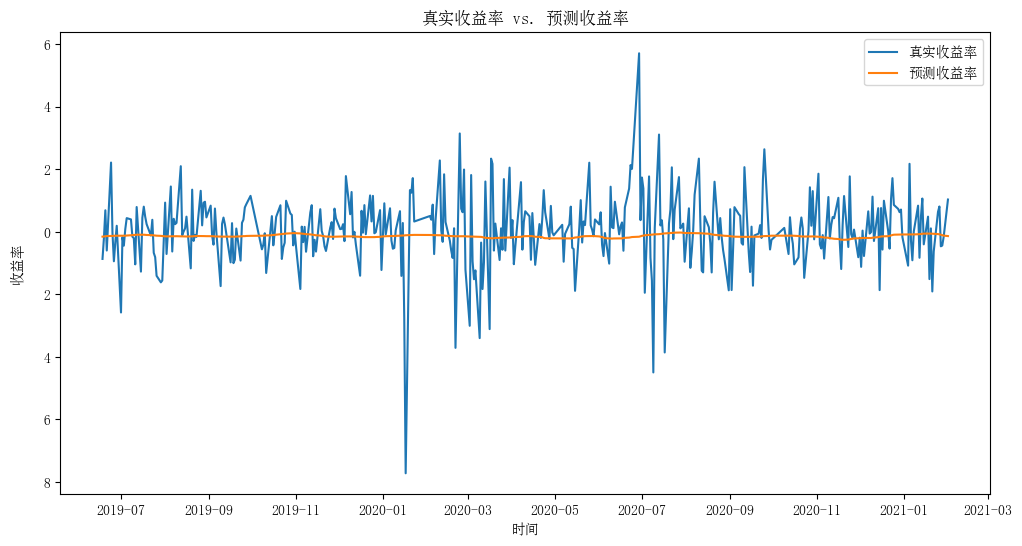

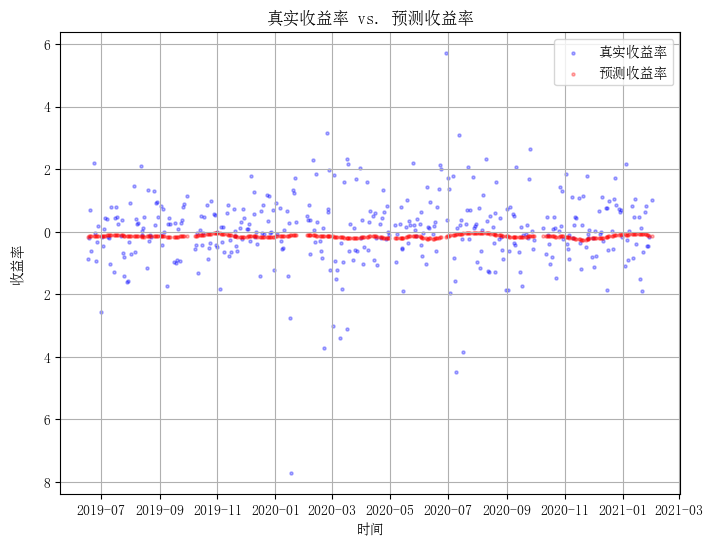

In [30]:
import matplotlib.pyplot as plt

# Set the font family to 'SimSun' for Chinese characters
plt.rcParams['font.family'] = 'SimSun'

# Create a new DataFrame with the same index as valid_data
predicted_returns_df = pd.DataFrame(index=valid_data.index)

# Assign the predicted values to the 'predicted_returns' column in the new DataFrame
predicted_returns_df['predicted_returns'] = predicted_returns

# Plot the true returns and predicted returns
plt.figure(figsize=(12, 6))
plt.plot(valid_data['target'], label='真实收益率')
plt.plot(predicted_returns_df['predicted_returns'], label='预测收益率')
plt.xlabel('时间')
plt.ylabel('收益率')
plt.title('真实收益率 vs. 预测收益率')
plt.legend()
plt.show()

# Scatter plot to show the correlation between predicted and actual returns
plt.figure(figsize=(8, 6))

# Plot actual returns in blue
plt.scatter(valid_data.index, valid_data['target'], s=5, c='blue', alpha=0.3,  label='真实收益率')

# Plot predicted returns in red
plt.scatter(valid_data.index, predicted_returns, s=5, c='red', alpha=0.3, label='预测收益率')

plt.xlabel('时间')
plt.ylabel('收益率')
plt.title('真实收益率 vs. 预测收益率')
plt.legend()
plt.grid(True)
plt.show()



## 滚动预测，窗口为60，应该如何分割数据集

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Set the random seed for reproducibility
np.random.seed(34370161)
tf.random.set_seed(34370161)

df_fin = pd.read_excel("SSE macd bias.xlsx")

# 假设你的原始数据中有'Open'、'Close'、'High'、'Low'、'Volume'等列，我们用这些列作为特征
selected_features = ['date','open', 'high', 'low', 'volume', 'close', 'turnover_rate', 'macd', 'bias_20',]
df_fin_selected = df_fin[selected_features].sort_index(ascending=True, axis=0)
df_fin_selected['date'] = pd.to_datetime(df_fin_selected['date'])  # 将'date'列转换为日期时间格式
df_fin_selected.set_index('date', inplace=True)  # 将'date'列设置为索引

# 假设你要预测未来5天的收益率
forecast_period = 5

# 目标变量 (Y) 的生成
threshold = 0.01  # 设置涨幅阈值，大于该阈值为1，小于等于该阈值为0
returns = df_fin_selected['close'].pct_change().shift(-forecast_period)  # 计算未来5天的收益率
df_fin_selected['target'] = returns * 100  # 转换为百分比形式，将收益率放大100倍
df_fin_selected.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_fin_selected)

window_size = 60

# 分割数据集为训练集和测试集
train_data = scaled_data[:int(0.8*len(scaled_data))]
test_data = scaled_data[int(0.8*len(scaled_data)):]

# 生成训练集滑动窗口样本序列
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i - window_size:i, :8])  # 使用前8个特征作为输入
    y_train.append(train_data[i, 8])  # 第9个特征作为目标值
X_train, y_train = np.array(X_train), np.array(y_train)

# 生成测试集滑动窗口样本序列
X_test, y_test = [], []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i - window_size:i, :8])  # 使用前8个特征作为输入
    y_test.append(test_data[i, 8])  # 第9个特征作为目标值
X_test, y_test = np.array(X_test), np.array(y_test)

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1],x_train_data.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)


# 计算收益率预测结果
predicted_returns = lstm_model.predict(X_test)
# 创建一个临时的 scaler 用于反归一化，该 scaler 仅使用第9个特征进行归一化
temp_scaler = MinMaxScaler(feature_range=(0, 1))
temp_scaler.min_ = scaler.min_[8]  # 使用第9个特征的 min 值
temp_scaler.scale_ = scaler.scale_[8]  # 使用第9个特征的 scale 值

predicted_returns = temp_scaler.inverse_transform(predicted_returns).flatten()

# 计算收益率预测结果对应的涨跌情况（1代表涨，0代表跌）
threshold = 0.01  # 设置涨幅阈值，大于该阈值为1，小于等于该阈值为0
predicted_labels = (predicted_returns > threshold).astype(int)

# 计算均方误差 (MSE)
mse = np.mean((predicted_returns - valid_data['target'].values) ** 2)
print(f"均方误差 (MSE): {mse}")

# 计算均方根误差 (RMSE)
rmse = np.sqrt(mse)
print(f"均方根误差 (RMSE): {rmse}")

1748/1748 - 20s - loss: 0.0129 - 20s/epoch - 11ms/step
15/15 [==============================] - 1s 9ms/step


ValueError: operands could not be broadcast together with shapes (474,) (399,) 

In [36]:
X_test.shape

(474, 60, 8)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Set the random seed for reproducibility
np.random.seed(34370161)
tf.random.set_seed(34370161)

df_fin = pd.read_excel("SSE macd bias.xlsx")

# 假设你的原始数据中有'Open'、'Close'、'High'、'Low'、'Volume'等列，我们用这些列作为特征
selected_features = ['date','open', 'high', 'low', 'volume', 'close', 'turnover_rate', 'macd', 'bias_20',]
df_fin_selected = df_fin[selected_features]
data = df_fin_selected.sort_index(ascending=True, axis=0)
# 假设data是你的DataFrame，包含'date'和'target'列
data['date'] = pd.to_datetime(data['date'])  # 将'date'列转换为日期时间格式
data.set_index('date', inplace=True)  # 将'date'列设置为索引

# 假设你要预测未来5天的收益率
forecast_period = 5

# 目标变量 (Y) 的生成
threshold = 0.01  # 设置涨幅阈值，大于该阈值为1，小于等于该阈值为0
returns = data['close'].pct_change().shift(-forecast_period)  # 计算未来5天的收益率
returns.dropna(inplace=True)  # 移除NaN值
data['target'] = returns * 100  # 转换为百分比形式，将收益率放大100倍

# 创建新的DataFrame，不包含日期列
new_dataset = pd.DataFrame()
new_dataset['target'] = data['target']
# 删除包含NaN值的行
new_dataset.dropna(inplace=True)

# 训练集和验证集划分
train_data = new_dataset.iloc[60:987]  # 前60个数据用于滑窗处理，从第61个数据开始作为训练数据
valid_data = new_dataset.iloc[987:-6]  # 前面的987个数据作为训练集，测试集长度减去5天

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_dataset)

x_train_data, y_train_data = [], []
# 数据滑窗处理：通过一个 for 循环遍历训练数据，每次取连续的 60 行数据作为输入特征（时间窗口为 60），以及接下来一行的 'target' 特征值作为目标值。
for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i - 60:i, 0])
    y_train_data.append(scaled_data[i, 0])  # 改回使用 'target' 特征值，索引为0

# 将列表转换为 NumPy 数组。
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
# 将特征数据 x_train_data 进行维度重塑，以符合 LSTM 模型的输入要求，将其转换为三维数组。
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

# 测试集数据的获取和预测保持不变
inputs_data = new_dataset[len(new_dataset) - len(valid_data) - 60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i - 60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# 计算收益率预测结果
predicted_returns = lstm_model.predict(X_test)
predicted_returns = scaler.inverse_transform(predicted_returns).flatten()

# 计算收益率预测结果对应的涨跌情况（1代表涨，0代表跌）
threshold = 0.01  # 设置涨幅阈值，大于该阈值为1，小于等于该阈值为0
predicted_labels = (predicted_returns > threshold).astype(int)

# 计算均方误差 (MSE)
mse = np.mean((predicted_returns - valid_data['target'].values) ** 2)
print(f"均方误差 (MSE): {mse}")

# 计算均方根误差 (RMSE)
rmse = np.sqrt(mse)
print(f"均方根误差 (RMSE): {rmse}")

您是正确的，如果存在滑动窗口，预测结果的长度通常会少于验证集的长度。这是因为滑动窗口的设计会导致预测结果的起始点和验证集的起始点不一致。

在这种情况下，可以通过调整滑动窗口的起始点来保持预测结果和验证集长度一致。一种常见的做法是，在生成滑动窗口样本序列时，从数据的最后一部分截取样本，这样预测结果的长度会和验证集一致。

In [ ]:
window_size = 60

# 分割数据集为训练集和测试集
train_data = scaled_data[:int(0.8*len(scaled_data))]
test_data = scaled_data[int(0.8*len(scaled_data)):]

# 生成训练集滑动窗口样本序列
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i - window_size:i, :8])  # 使用前8个特征作为输入
    y_train.append(train_data[i, 8])  # 第9个特征作为目标值
X_train, y_train = np.array(X_train), np.array(y_train)

# 生成测试集滑动窗口样本序列
X_test, y_test = [], []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i - window_size:i, :8])  # 使用前8个特征作为输入
    y_test.append(test_data[i, 8])  # 第9个特征作为目标值
X_test, y_test = np.array(X_test), np.array(y_test)

# 生成验证集滑动窗口样本序列，从数据的最后一部分截取样本，保持和测试集长度一致
valid_data = scaled_data[int(0.6*len(scaled_data))-window_size:int(0.8*len(scaled_data))]
X_valid, y_valid = [], []
for i in range(window_size, len(valid_data)):
    X_valid.append(valid_data[i - window_size:i, :8])  # 使用前8个特征作为输入
    y_valid.append(valid_data[i, 8])  # 第9个特征作为目标值
X_valid, y_valid = np.array(X_valid), np.array(y_valid)


## 滑动窗口，预测未来5天收益率？

采用每次预测后将已预测日期的真实数据添加到训练集和验证集中，并继续进行预测的滑动窗口方式，可以用于进行滚动预测。这种方法可以模拟在实际应用中每天或每个时间步更新一次预测并使用最新的真实数据进行训练的情况。

具体步骤如下：

1. 首先，将数据集划分为训练集和验证集。可以采用之前提到的方法，例如按照时间顺序划分数据集的一部分作为验证集。

2. 使用训练集进行模型的训练，例如使用LSTM模型。

3. 选择滑动窗口大小，例如60个时间步。然后，从测试集中取出前60个时间步的数据作为初始输入。

4. 对于每个时间步，使用模型进行预测。将预测结果添加到训练集中，并从测试集中取出下一个时间步的真实数据作为下一次的输入。

5. 继续迭代上述步骤，直到遍历完整个测试集，得到所有预测结果。

6. 计算预测结果的误差，例如使用均方误差（MSE）等指标来评估模型的性能。

7. 可以根据需要调整滑动窗口的大小和其他参数，并进行多次滚动预测来观察模型的表现。

需要注意的是，滚动预测的方法可以更好地模拟在实际应用中的情况，但也需要谨慎使用。如果测试集较小，滚动预测可能会导致过拟合，因为每次预测后都将真实数据添加到训练集中，模型可能会过于依赖最新的数据。因此，在使用滚动预测时，需要确保测试集足够大，并且要注意评估模型的泛化能力。

In [6]:
import numpy as np
import pandas as pd
df_fin = pd.read_excel("SSE macd bias.xlsx")

# 假设你的原始数据中有'Open'、'Close'、'High'、'Low'、'Volume'等列，我们用这些列作为特征
selected_features = ['date','open', 'high', 'low', 'volume', 'close', 'turnover_rate', 'macd', 'bias_20',]
df_fin_selected = df_fin[selected_features].sort_index(ascending=True, axis=0)
df_fin_selected['date'] = pd.to_datetime(df_fin_selected['date'])  # 将'date'列转换为日期时间格式
df_fin_selected.set_index('date', inplace=True)  # 将'date'列设置为索引

# 假设你要预测未来5天的收益率
forecast_period = 5

# 目标变量 (Y) 的生成
threshold = 0.01  # 设置涨幅阈值，大于该阈值为1，小于等于该阈值为0
returns = df_fin_selected['close'].pct_change().shift(-forecast_period)  # 计算未来5天的收益率
df_fin_selected['target'] = returns * 100  # 转换为百分比形式，将收益率放大100倍
df_fin_selected.dropna(inplace=True)

# 最后180天作为测试集
final_dataset = df_fin_selected

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
# Assuming you have already loaded and preprocessed your dataset and have a DataFrame called 'final_dataset'

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

# Split the dataset into train, validation, and test sets
train_size = int(0.6 * len(scaled_data))
valid_size = int(0.2 * len(scaled_data))
train_data = scaled_data[:train_size]
valid_data = scaled_data[train_size:train_size+valid_size]
test_data = scaled_data[train_size+valid_size:]


# Define sliding window function
def sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size, :8])  # Use first 8 features as input
        y.append(data[i + window_size, 8])    # Use the 9th feature as the target
    return np.array(X), np.array(y)

# Set the sliding window size (e.g., 60)
window_size = 60

# Generate train, validation, and test sliding window samples
X_train, y_train = sliding_window(train_data, window_size)
X_valid, y_valid = sliding_window(valid_data, window_size)
X_test, y_test = sliding_window(test_data, window_size)

# Reshape the input data to fit LSTM model requirements
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 8)))  # Assuming 8 input features
model.add(Dense(1))  # Assuming predicting one output value
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=2)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")


Epoch 1/100
45/45 - 2s - loss: 0.0465 - val_loss: 0.0109 - 2s/epoch - 43ms/step
Epoch 2/100
45/45 - 1s - loss: 0.0124 - val_loss: 0.0093 - 546ms/epoch - 12ms/step
Epoch 3/100
45/45 - 1s - loss: 0.0114 - val_loss: 0.0089 - 536ms/epoch - 12ms/step
Epoch 4/100
45/45 - 1s - loss: 0.0106 - val_loss: 0.0086 - 541ms/epoch - 12ms/step
Epoch 5/100
45/45 - 1s - loss: 0.0106 - val_loss: 0.0087 - 548ms/epoch - 12ms/step
Epoch 6/100
45/45 - 1s - loss: 0.0104 - val_loss: 0.0086 - 538ms/epoch - 12ms/step
Epoch 7/100
45/45 - 1s - loss: 0.0105 - val_loss: 0.0091 - 545ms/epoch - 12ms/step
Epoch 8/100
45/45 - 1s - loss: 0.0102 - val_loss: 0.0084 - 551ms/epoch - 12ms/step
Epoch 9/100
45/45 - 1s - loss: 0.0102 - val_loss: 0.0086 - 538ms/epoch - 12ms/step
Epoch 10/100
45/45 - 1s - loss: 0.0102 - val_loss: 0.0084 - 555ms/epoch - 12ms/step
Epoch 11/100
45/45 - 1s - loss: 0.0105 - val_loss: 0.0084 - 582ms/epoch - 13ms/step
Epoch 12/100
45/45 - 1s - loss: 0.0101 - val_loss: 0.0086 - 597ms/epoch - 13ms/step
Epoc

1/1 [==============================] - 0s 16ms/step


In [ ]:
# Perform rolling forecasting
rolling_predictions = []
for i in range(len(X_test)):
    input_data = X_test[i:i+1, :, :]
    predicted_value = model.predict(input_data)
    rolling_predictions.append(predicted_value[0, 0])
    # Add the true value to the train set for the next iteration
    train_data = np.append(train_data, [test_data[i]], axis=0)
 

在这段代码中，我们通过 model.fit() 在模型训练过程中使用验证数据。EarlyStopping 回调用于在一定数量的历时（耐心参数）内验证损失没有改善时停止训练。这有助于防止过度拟合。

训练结束后，我们使用 model.evaluate() 评估模型在测试集上的表现。通过测试损失，我们可以了解模型对未见数据的泛化程度。请注意，本代码片段中不包括滚动预测部分，但您可以根据自己的具体要求进行整合。

通过监控训练过程中的验证损失，您可以深入了解模型的性能，并在必要时做出超参数调整或提前停止的决定。

如果想在测试集之外有一个单独的验证集，可以将训练集进一步拆分为训练集和验证集。这样，您就可以使用验证集来监控模型在训练过程中的表现，并在必要时调整超参数。

在训练过程中加入验证集，可以更好地了解模型在训练过程中的表现，避免过度拟合。验证集与测试集是分开的，不用于滚动预测。它用于评估模型在训练过程中的性能和超参数调整。

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Create a new MinMaxScaler for the target variable y_test
target_scaler = MinMaxScaler()
target_scaler.fit(y_test.reshape(-1, 1))

# Inverse transform the predictions and true values to the original scale
y_test = y_test.reshape(-1, 1)  # Reshape to (num_samples, 1)
rolling_predictions = np.array(rolling_predictions).reshape(-1, 1)

# Inverse transform both rolling_predictions and y_test using their respective scalers
rolling_predictions = target_scaler.inverse_transform(rolling_predictions).flatten()
y_test = target_scaler.inverse_transform(y_test).flatten()

# Calculate MSE
mse = mean_squared_error(y_test, rolling_predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0031135253845043336


在使用滚动预测时，需要确保测试集足够大，并且要注意评估模型的泛化能力。

低 MSE 表示模型的预测值接近实际值，这是模型在未见数据上表现良好的良好迹象。

测试损失值表示训练模型在未见数据（测试集）上的表现。在机器学习模型中，损失函数是衡量模型预测值与实际（地面实况）值匹配程度的指标。它量化了预测值与真实目标值之间的差异。

测试损失值低意味着模型在测试集上表现良好，并能对未见数据做出准确预测。另一方面，高测试损失值表明模型对新数据的泛化效果不佳，可能是对训练数据的过度拟合。

在评估机器学习模型时，必须同时考虑训练损失和测试损失。如果模型在训练数据上表现良好，但在测试数据上表现不佳，则可能是过度拟合，而在两组数据上表现相似的模型可能泛化得更好。

总之，测试损失客观地衡量了模型对新数据的泛化程度，是评估模型性能的关键指标。